# Sales Prediction for BigMart

## Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

This project is a regression problem i.e. we are predicting a continous value and will be solved via supervised learning because we already have past sales data.

## Hypothesis

These hypotheses were taken from [here](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/).

### Store Level Hypotheses:


1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
1. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
1. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
1. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
1. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
1. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
1. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
1. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
1. Packaging: Products with good packaging can attract customers and sell more.
1. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
1. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
1. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
1. Advertising: Better advertising of products in the store will should higher sales in most cases.
1. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

## Exploring the dataset

| Variable                  | Description                                                                      |
|---------------------------|----------------------------------------------------------------------------------|
| Item_Identifier           | Unique Product ID                                                                |
| Item_Weight               | Weight of product                                                                |
| Item_Fat_Content          | Low in fat or not (Low Fat, Regular)                                             |
| Item_Visibility           | % of total display area allocated to the product                                 |
| Item_Type                 | Category for the product                                                         |
| Item_MRP                  | Maximum Retail price of the product                                              |
| Outlet_Identifier         | Unique Store ID                                                                  |
| Outlet_Establishment_Year | Year store was made                                                              |
| Outlet_Size               | Size of store (small, medium, high)                                              |
| Outlet_Location_Type      | Type of city (tier 1, tier 2, tier 3)                                            |
| Outlet_Type               | Supermarket or grocery                                                           |
| Item_Outlet_Sales         | Sale of product in the particular store. (Also what we are trying to predict!!!) |

## Getting Started

We use a virtual environment to do all our development in, this ensures that we don't import modules that accidentally conflict with other project work. 

1. `python3 -m venv venv` - this will create your virtual environment inside a `venv` folder
2. `source venv/bin/activate` - this will activate your virtual env
3. `python3 -m pip install -r requirements.txt`
4. If working on VSC you can press `cmd + shift + p` to bring up the command palette then type in `kernel` and select the `Notebook: select kernel` option then choose the virtual environment.

## Adding new modules

New modules should be added to the virtual env with the following command: `pip install <module-name>`
After the module has been added you should update the `requirements.txt` file using: `pip freeze > requirements.txt`

## Data analysis

In [177]:
import pandas as pd

train = pd.read_csv('data/train_kOBLwZA.csv')
test = pd.read_csv('data/test_t02dQwI.csv')

print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [178]:
df = pd.concat([train, test], ignore_index=True)
print(df.dtypes)
print(df.shape)
df.head()

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
(14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [179]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [180]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above table we can that there is quite a disparrity between the minimum sale and the max sale. The standard deviation is also quite large which tells us that the data points are spread out over a wide range of values indicating a possible outlier. Lets plot it out to see if our theory is correct. 

Another thing I noticed is that the item visibility is 0. This doesn't make much sense as how can a person know to buy the item if they don't know its on sale?

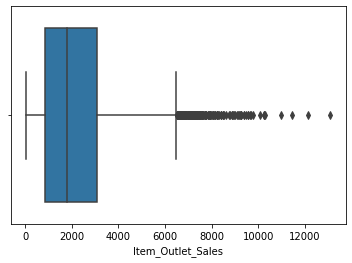

In [181]:
import seaborn as sns

ax = sns.boxplot(x=df["Item_Outlet_Sales"])

![box plot](assets/boxplot.png)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

- median (Q2/50th Percentile): the middle value of the dataset.
- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- interquartile range (IQR): 25th to the 75th percentile.
- whiskers (shown in blue)
- outliers (shown as green circles)
- “maximum”: Q3 + 1.5*IQR
- “minimum”: Q1 -1.5*IQR

Now after re-capping on some basic high school lessons about boxplot we can understand that our sales data contains a considerable number of outliers. Also our data seems to be skewed more towards the lower end with the median being around 2000.


In [182]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR, Q1, Q3)

max_outliers = Q3 + 1.5 * IQR
print('\nmax outliers:\n', max_outliers)

Item_Weight                     8.040000
Item_Visibility                 0.067002
Item_MRP                       91.843600
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64 Item_Weight                     8.710000
Item_Visibility                 0.027036
Item_MRP                       94.012000
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64 Item_Weight                    16.750000
Item_Visibility                 0.094037
Item_MRP                      185.855600
Outlet_Establishment_Year    2004.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

max outliers:
 Item_Weight                    28.81000
Item_Visibility                 0.19454
Item_MRP                      323.62100
Outlet_Establishment_Year    2029.50000
Item_Outlet_Sales            6501.86990
dtype: float64


We plot the maximum outliers and now we know the specific value of the sales outliers but also the rest of the dataframe. Lets work out if we can find the number of outliers in each column.

In [183]:
import numpy as np

def replaceOutliersWithNaN(values, outlier):
    return [value if value < outlier else np.nan for value in values ]
    
df1 = df.apply(lambda col: replaceOutliersWithNaN(col, max_outliers[col.name]) if col.name in max_outliers.keys() else col, axis=0)
beforeNaN = df.isna().sum().sum()
afterNaN = df1.isna().sum().sum()
outlier_count = afterNaN - beforeNaN
df1['Item_Outlet_Sales'].isna().sum()
df = df1


We have replaced outliers in the dataframe with NaN but what should we do with them? We have several options: 
- Do nothing, some algorithms might throw errors
- We drop the outliers but this reduces our dataset and potentially our predictive power.
- We replace the NaNs with the mean or median value for that column. If we replace them with the mean then one interesting thing is that the mean value doesn't change!
- Replace with most frequent values (works well with string columns) but may introduce bias into the dataset.
- Replace with constant values e.g. 0
- Use K-NN to find feature similarity (computationally expensive)
- Imputation using MICE or deep learning (datawig)

For now we will proceed with outliers but it's something we can try changing in the future.

## Plotting graphs for further analysis



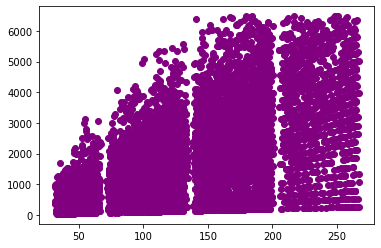

In [184]:
import matplotlib.pyplot as plt

plt.scatter(df1.Item_MRP, df1.Item_Outlet_Sales, c="purple")
plt.show()

# We can see that as the maximum retail price of the product increases so does the amount of revenue for that product in that store.

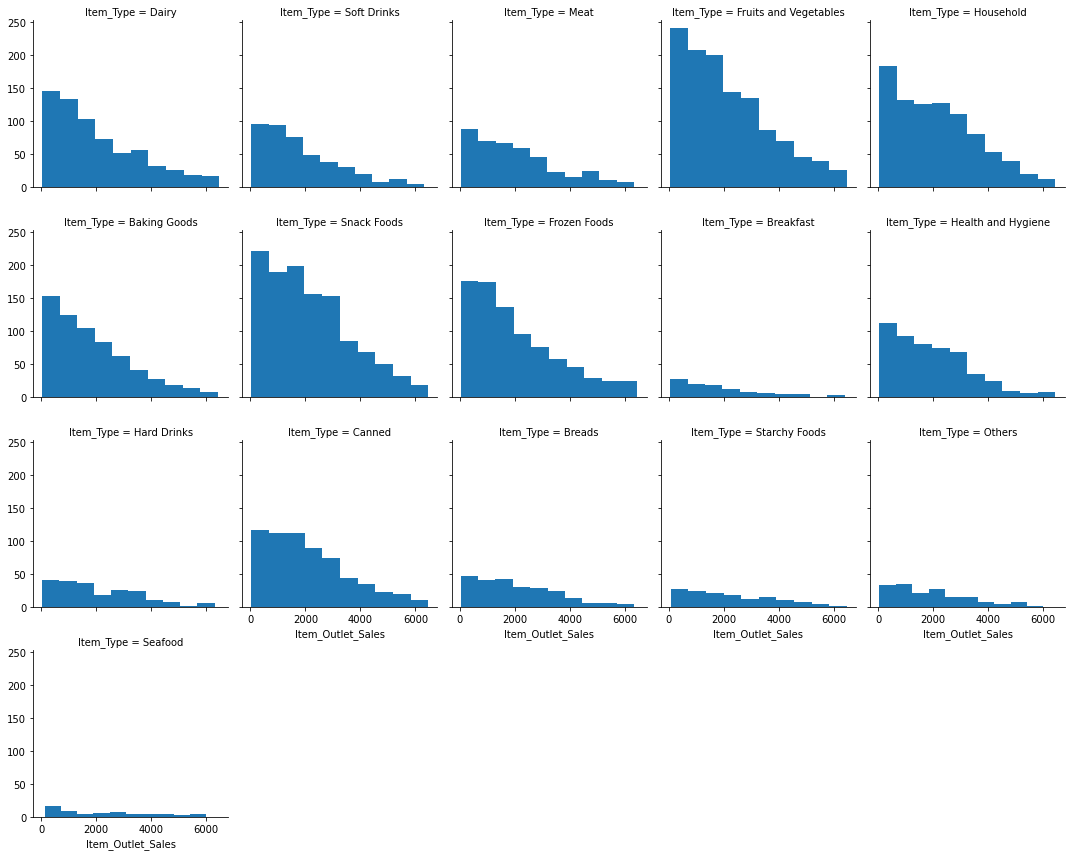

In [185]:
# Prefer grid graphs for categorical data

sns.FacetGrid(df1, col="Item_Type", height=3, col_wrap=5).map(plt.hist, 'Item_Outlet_Sales').add_legend()

From the above Facet Grid out of all the different types of items the shops sell, the ones generating the most profit is Snack foods and Fruit and Vegetables. Overall food scores quite well in comparison to drinks.

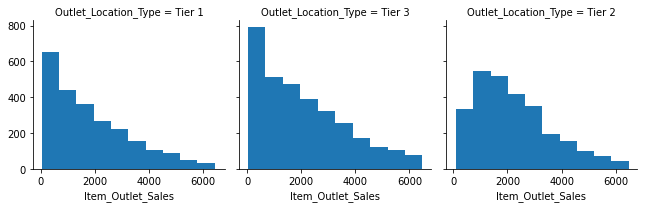

In [186]:
sns.FacetGrid(df, col="Outlet_Location_Type", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

This one is a bit harder to compare but looks like there are higher sales from a Tier 3 shop compared to the other tiers. But there is also a larger amount of shops in Tier 3 which are not generating much/if any profit.

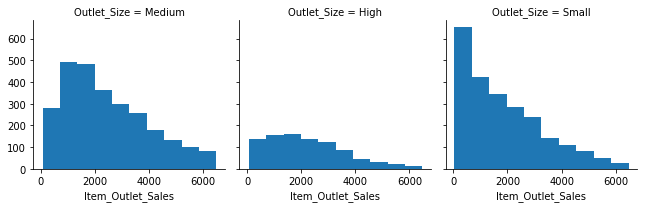

In [187]:
sns.FacetGrid(df, col="Outlet_Size", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

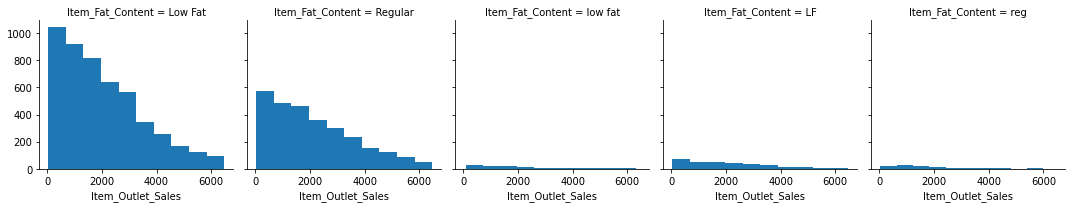

In [188]:
sns.FacetGrid(df, col="Item_Fat_Content", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

This result is rather interesting because we have discovered an issue with the data set! As you can see "low fat", "Low Fat" and "LF" are all the same thing! Same with "Regular" and "reg".

Overall Low fat products seem to be selling more - people being more health conscious


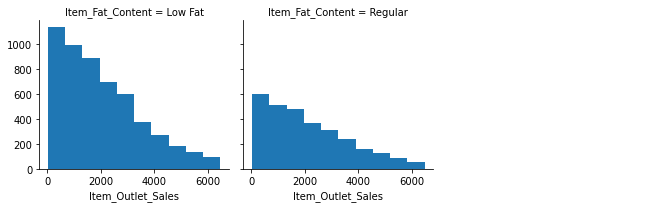

In [189]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["low fat", "LF", "reg"], ["Low Fat", "Low Fat", "Regular"])
sns.FacetGrid(df, col="Item_Fat_Content", height=3, col_wrap=3).map(plt.hist, "Item_Outlet_Sales").add_legend()

# Fixing the fat content data issue

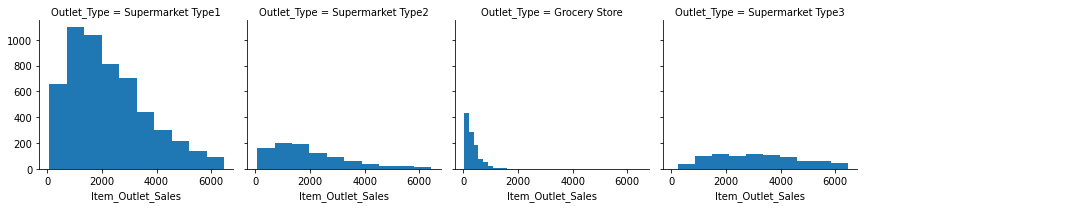

In [190]:
sns.FacetGrid(df, col="Outlet_Type", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

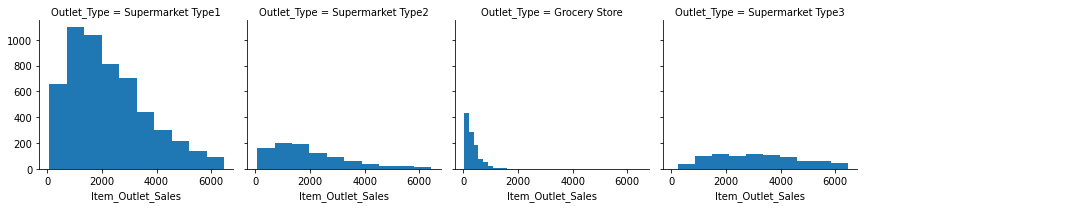

In [191]:
sns.FacetGrid(df1, col="Outlet_Type", height=3, col_wrap=5).map(plt.hist, "Item_Outlet_Sales").add_legend()

Supermarket sales far outweigh grocery stores, maybe because there is more variety of products to choose from?

When looking at item identifiers we can see they all start with FD, DR or NC. Comparing the item identifier to the item type and we can deduce that: 
- FD = Food
- DR = Drink
- NC = Non-consumable.

We should create an additional feature that encompasses this information.

In [192]:
df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2]).copy()
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [193]:
# This then made me think back to the low fat contents and surely an item labelled as non-consumerable should not have a fat content right?

# gets each row as true/false
rows_of_non_consumerable = df["Item_Type_combined"] == "Non_consumable"

# replace the truthy with "N/A" rather than "No Fat" to avoid confusion in future with zero fat products
df["Item_Fat_Content"][rows_of_non_consumerable] = "N/A"
df["Item_Fat_Content"].value_counts()



/var/folders/n5/ffqtk_k17s3gt9ypzktqdpbc0000gn/T/ipykernel_28644/3169015877.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][rows_of_non_consumerable] = "N/A"


Low Fat    6499
Regular    5019
N/A        2686
Name: Item_Fat_Content, dtype: int64

In [194]:
# Our model can't understand the categorial data e.g. Canned, Dairy, Seafood. Instead we need to map them into numerical values
# Canned => 0, Dairy => 1,...

#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
# categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = df.apply(lambda col: label_encoder.fit_transform(col) if col.name in categorical_columns else col )
df.head()


Frequency of Categories for varible Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for varible Item_Fat_Content
Low Fat    6499
Regular    5019
N/A        2686
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier
OUT027    1559

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800,1
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


In [195]:
#Using feature Engineering and adding new column
df['yearsold']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()


# drop id columns
df = df.drop(columns=["Item_Identifier", "Outlet_Identifier"])

In [211]:
#Separating test and train set
# 8523 was number in train set. If we removed NaNs then we would have to split this differently.
print(df.shape)
df_train=df.iloc[:8523,:]
df_test=df.iloc[8523:,:]

# going to remove nan values here as when building models it was complaining
df_train.dropna(inplace=True)

Y_train = df_train["Item_Outlet_Sales"]
X_train = df_train.drop(columns=['Item_Outlet_Sales'])
print("train shape: ", X_train.shape)

# test set doesnt contain "Item_Outlet_Sales"
X_test=df_test.drop(columns=['Item_Outlet_Sales'])
X_test.dropna(inplace=True)

print("test shape: ", X_test.shape)

# print(X_train.head())


(14204, 11)
train shape:  (6907, 10)
test shape:  (4648, 10)


/Users/joshdando/Documents/projects/sales-prediction/venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [212]:
# Generating polynomial features
# allow the use of simpler modeling algorithms as some of the complexity of interpreting the input variables and their relationships is pushed back to the data preparation stage. 
# Sometimes these features can result in improved modeling performance, although at the cost of adding thousands or even millions of additional input variables.

from sklearn.preprocessing import PolynomialFeatures


poly_transformer = PolynomialFeatures(degree=2)
cols = X_train.columns
X_train = poly_transformer.fit_transform(X_train)
X_test = poly_transformer.transform(X_test)

column_names = poly_transformer.get_feature_names_out(cols)

# TODO: this should be part of hyper param training


## Feature Scaling

The idea of feature scaling is to make the features a similar scale so that gradient descent converges quicker. (Wk 2 Andrew Ng machine learning). Any algorithm that uses euclidean distance will benefit from feature scaling. 

We can acomplish this with mean normalization: we replace all features (x(i) - u(i))/std dev or (max-min) (where u = mean) to make all features have approximately zero mean. 

Note: Depending on the model you are using you would typically set x(0) = 1.

In [213]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we fit the scaler on the training data
scaled_X_train = scaler.fit_transform(X_train)
# make sure not to re-fit the scaler on the test set otherwise we have introduced another parameter which is fitted
# leading to optimistic estimates
scaled_X_test = scaler.transform(X_test)

df_standardized_X_train = pd.DataFrame(data=scaled_X_train,columns=column_names)

df_standardized_X_test = pd.DataFrame(data=scaled_X_test, columns=column_names)
df_standardized_X_train.head()

,1,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,...,Outlet_Location_Type^2,Outlet_Location_Type Outlet_Type,Outlet_Location_Type Item_Type_combined,Outlet_Location_Type yearsold,Outlet_Type^2,Outlet_Type Item_Type_combined,Outlet_Type yearsold,Item_Type_combined^2,Item_Type_combined yearsold,yearsold^2
0,0.0,-0.767126,-0.999238,-1.013712,-0.768197,1.771227,-0.767113,-1.384326,-0.142416,-0.176781,...,-1.053067,-0.936870,-1.067774,-0.809212,-0.307095,-0.208174,0.297423,-0.374771,0.033227,-0.016878
1,0.0,-1.494571,1.236504,-0.942859,1.608589,-1.485480,-0.767113,1.201621,2.093190,-2.081658,...,1.361585,2.191086,-1.067774,-0.330590,2.471644,-1.495422,-0.577866,-1.172473,-1.310570,-0.902432
2,0.0,0.997681,-0.999238,-0.998081,0.657875,0.022953,-0.767113,-1.384326,-0.142416,-0.176781,...,-1.053067,-0.936870,-1.067774,-0.809212,-0.307095,-0.208174,0.297423,-0.374771,0.033227,-0.016878
3,0.0,1.363556,1.236504,-1.365626,-0.292840,0.677026,1.145340,1.201621,-2.378022,-0.176781,...,1.361585,-0.936870,0.750772,0.985620,-1.233341,-1.495422,-1.744917,-0.374771,0.129213,0.125795
4,0.0,-0.846758,0.118633,-1.365626,0.420196,-1.395115,-1.723339,1.201621,-0.142416,1.728096,...,1.361585,0.627108,2.569318,2.301830,-0.307095,1.079074,2.048001,2.018335,3.680678,2.344600


## Building Models

We should start with a baseline model and see if this problem can be done with the simplest model: linear regression. If not then we can move onto more complicated models that will capture non-linear trends.

Above we have split our training data back into a training set and a test set. We can't train the model alone on the training set because although it might perform really well on the train data it might perform badly on the test data this is known as overfitting/high variance. 

So can we train against the training set then pick the one that chooses the lowest test error? Nope this is because you are fitting the degree of the polynomial (d) that best suits the test set leading to an optimistic estimate. Remember that linear regression is h(x) = \theta_0 + \theta_1 * X where \theta is your parameters (think y = mx + c).

Instead we should introduce a cross validation set. We pick the model resulting in the least error on the cross-val.


In [214]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k])

def my_basic_model_selection(x,y,cross_folds,models, scorer):
    scores=[]
    names = []
    for name , model in models:
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        # scoring works where higher scores is better than low
        cv_scores = cross_val_score(model, x, y, cv=cross_folds, n_jobs=5, scoring=scorer)
        scores.append(cv_scores)
        names.append(name)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())


models = [("linear regression", LinearRegression()), ("Ridge regression", Ridge()), ('rfr',RandomForestRegressor()),('etr',ExtraTreesRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet()),('mlp',MLPRegressor())]

# my_basic_model_selection(df_standardized_X_train, Y_train, 4, models, scorer="neg_mean_squared_error")
my_basic_model_selection(X_train, Y_train, 4, models, scorer="max_error")
# basic_model_selection(X_train, Y_train, 4, models)

/Users/joshdando/Documents/projects/sales-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+09, tolerance: 1.034e+06
  model = cd_fast.enet_coordinate_descent(
/Users/joshdando/Documents/projects/sales-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+09, tolerance: 1.054e+06
  model = cd_fast.enet_coordinate_descent(
/Users/joshdando/Documents/projects/sales-prediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase 

linear regression -3804.60959308981
Ridge regression -3808.675948019409
rfr -4176.478510499999
etr -4466.8105875
br -4239.115309999999
gbr -3876.040305475686
en -3804.110198514295
mlp -3829.7559073596635


## Error analysis

We plot a learning curve of the training set and the cross-validation set to see how the learning went. From this we can observe whether the model is high bias/variance and decide on how to act.

<module 'matplotlib.pyplot' from '/Users/joshdando/Documents/projects/sales-prediction/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

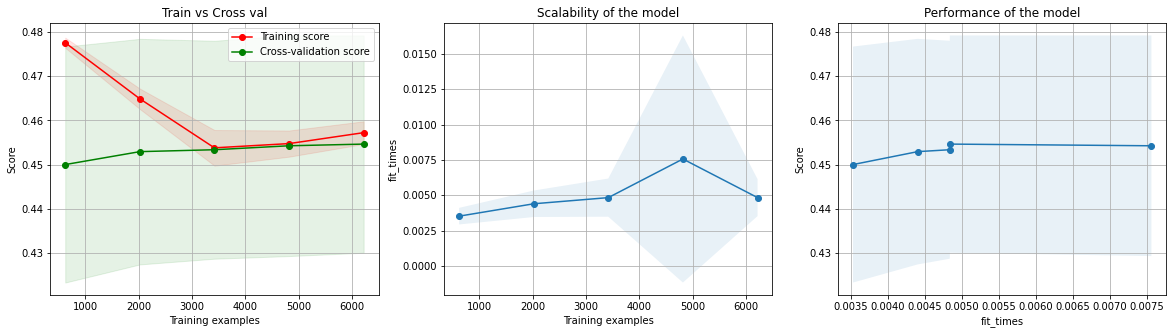

In [ ]:
import plot_learning_curve

estimator = LinearRegression()
plot_learning_curve.plot_learning_curve(estimator, "Train vs Cross val", df_standardized_X_train, Y_train, cv=10, n_jobs=5, scorer="r2" )

# Perfect R2 score would be 1.

From this graph we can deduce that linear regression is simply not powerful enough to grasp the underlying pattern of this data because the performance of the model is not increasing by very much. 

This model is suffering from high bias, typically to solve this we can do the following: 
- Increase the number of features
- Introduce polynomial features
- Pick a better model


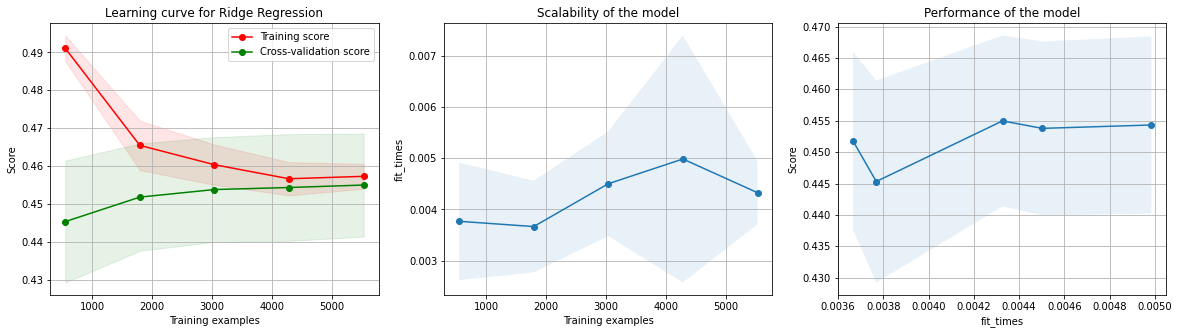

In [ ]:
from sklearn.linear_model import Ridge

# by default doesnt do any normalization (we already did this above anyhow)
estimator = Ridge()
plot_learning_curve.plot_learning_curve(estimator, "Learning curve for Ridge Regression", df_standardized_X_train, Y_train, cv=5, n_jobs=5, scorer="r2" )

clf = Ridge()
clf.fit(X_train, Y_train)

predictions = clf.predict(df_standardized_X_test)
# convert numpy array to dataframe
predictions = pd.DataFrame(predictions,columns=['Predictions'])

predictions.to_csv("./data/predictions001.csv")